## **MODEL EVALUATION AND REFINEMENT**

Learning Objectives
+ Describe data model refinement techniques
+ Explain overfitting, underfitting and model selection
+ Apply ridge regression to regularize and reduce the standard errors to avoid overfitting a regression model
+ Apply grid search techniques to Python data

In [15]:
## import the required packages
import pandas as pd
import numpy as np

## Libraries for plotting
from ipywidgets import interact, interactive, fixed, interact_manual

In [11]:
## read the file
df_cleaned = pd.read_csv("clean_df.csv")
# df_cleaned.head()

## drop unnamed column
column_to_drop = "Unnamed: 0"
df_cleaned.drop(column_to_drop, axis = 1, inplace = True)
df_cleaned.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


In [13]:
## only use numeric data
df = df_cleaned.copy()
df = df.select_dtypes(include = "number")
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,5000.0,21,27,13495.0,11.190476,8.703704,0,1,1,0
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,5000.0,21,27,16500.0,11.190476,8.703704,0,1,1,0
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,...,5000.0,19,26,16500.0,12.368421,9.038462,0,1,1,0
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,...,5500.0,24,30,13950.0,9.791667,7.833333,0,1,1,0
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,...,5500.0,18,22,17450.0,13.055556,10.681818,0,1,1,0


**FUNCTIONS FOR PLOTTING**

In [63]:


def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 5
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist = False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist = False, color="b", label=BlueName)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()
    
    
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 5
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

**TRAINING AND TESTING**

+ An important step in testing your model is to split your data into training and testing data.

In [25]:
## target data point
y_data = df["price"]
x_data = df.drop("price", axis = 1)

print("Shape of Y data :--",y_data.shape)
print("Shape of X data :--",x_data.shape)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("Shape of training data :--", x_train.shape)
print("Shape of training labels :--", y_train.shape)
print("Shape of testing data :--", x_test.shape)
print("Shape of testing labels :--", y_test.shape)

Shape of Y data :-- (201,)
Shape of X data :-- (201, 21)
Shape of training data :-- (180, 21)
Shape of training labels :-- (180,)
Shape of testing data :-- (21, 21)
Shape of testing labels :-- (21,)


In [31]:
## performing regression 
from sklearn.linear_model import LinearRegression
## initiate a linear regression object
lin_reg = LinearRegression()
## We fit the model using the feature "horsepower"
lin_reg.fit(x_train[['horsepower']], y_train)
## Let's calculate the R^2 on the test data
print("R2 score of Model using Horsepower for test Data:--",lin_reg.score(x_test[['horsepower']], y_test))
print("R2 score of Model using Horsepower for train Data:--",lin_reg.score(x_train[['horsepower']], y_train))

R2 score of Model using Horsepower for test Data:-- 0.36339478087886834
R2 score of Model using Horsepower for train Data:-- 0.6622424809407366


The R2 score is smaller when working with test data. And its comparitively higher with Training Data.

This is because we don't have lot of data.

So we will do Cross Validation.

**CROSS VALIDATION SCORE**

In [40]:
from sklearn.model_selection import cross_val_score
## We input the object, the feature ("horsepower"), and the target data (y_data). 
## The parameter 'cv' determines the number of folds. In this case, it is 4. 4 folds.
Rcross = cross_val_score(lin_reg, x_data[['horsepower']], y_data, cv=4)
print(Rcross)
## calculate the average and standard deviation of our estimate:
print("Average of the Cross Validation : --", Rcross.mean(),"\n",  "Standard Deviation of the Rcross :--", Rcross.std())
## We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'
-1 * cross_val_score(lin_reg,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

[0.77477095 0.51725019 0.74924821 0.04771764]
Average of the Cross Validation : -- 0.5222467481979471 
 Standard Deviation of the Rcross :-- 0.29176230741826353


array([20240865.23167854, 43737944.37864215, 12470270.77569642,
       17574447.8797166 ])

+ You can also use the function 'cross_val_predict' to predict the output. 
+ The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training

In [42]:
from sklearn.model_selection import cross_val_predict
## We input the object, the feature "horsepower", and the target data y_data. 
## The parameter 'cv' determines the number of folds. In this case, it is 4.
yhat = cross_val_predict(lin_reg,x_data[['horsepower']], y_data,cv=4)
print(yhat[0:5])

[14144.56553323 14144.56553323 20819.140433   12747.56148444
 14765.45622158]


**OVERFITTING, UNDERFITTING AND MODEL SELECTION**

Let's create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features

In [44]:
lr = LinearRegression()
## multiple linear regression model
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
## Prediction using training data:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
print("Prediction using Training Data  : --",yhat_train[0:5])
## Prediction using test data:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
print("Prediction Using Testing Data :--",yhat_test[0:5])

Prediction using Training Data  : -- [ 7425.12006788 28327.02313301 14210.29915814  4054.61292262
 34498.57562361]
Prediction Using Testing Data :-- [11350.96269501  5884.81415149 11206.85674887  6640.86207975
 15566.72516819]


C:\Users\Faiz Salam\AppData\Local\Temp\ipykernel_27484\2303361820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist = False, color="r", label=RedName)
C:\Users\Faiz Salam\AppData\Local\Temp\ipykernel_27484\2303361820.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

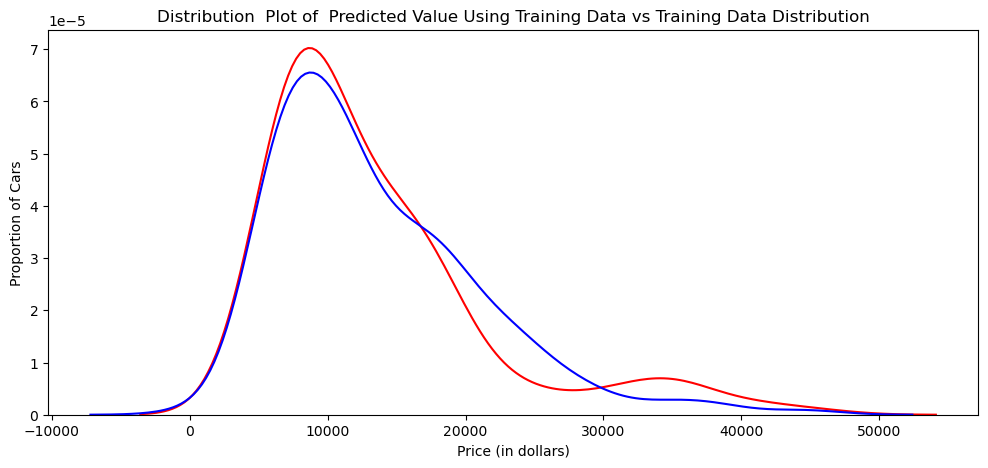

In [64]:
## perform some model evaluation using our training and testing data separately
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## distribution of the predicted values of the training data
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\Users\Faiz Salam\AppData\Local\Temp\ipykernel_27484\2303361820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist = False, color="r", label=RedName)
C:\Users\Faiz Salam\AppData\Local\Temp\ipykernel_27484\2303361820.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

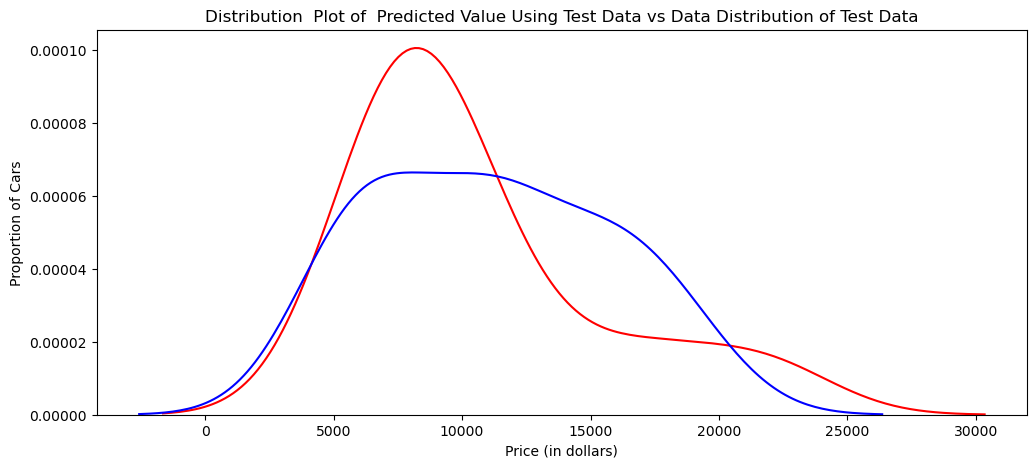

In [65]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.

+ The model seems to be doing well in learning from the training dataset. 
+ But what happens when the model encounters new data from the testing dataset? 
+ When the model generates new values from the test data, 
+ we see the distribution of the predicted values is much different from the actual target values.

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.

+ Comparing Figure 1 and Figure 2, 
+ it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. 
+ This difference in Figure 2 is apparent in the range of 5000 to 15,000. 
+ This is where the shape of the distribution is extremely different. 
+ Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

**Overfitting**

+ Overfitting occurs when the model fits the noise, but not the underlying process. 
+ Therefore, when testing your model using the test set,
+ your model does not perform as well since it is modelling noise, 
+ not the underlying process that generated the relationship. 

Let's create a degree 5 polynomial model.

In [70]:
from sklearn.preprocessing import PolynomialFeatures
## lets create a model of polynomial degree 5
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
print(pr)

## create a Linear Regression model "poly" and train it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

## output of our model using the method "predict." We assign the values to "yhat".
yhat = poly.predict(x_test_pr)
print(yhat[0:5])

## the first five predicted values and compare it to the actual targets
print("Predicted values:-------", yhat[0:4])
print("True values:------------", y_test[0:4].values)

PolynomialFeatures(degree=5)
[ 6722.89816409  7301.42994357 12214.14670622 18901.64793198
 20000.20066349]
Predicted values:------- [ 6722.89816409  7301.42994357 12214.14670622 18901.64793198]
True values:------------ [ 6295. 10698. 13860. 13499.]


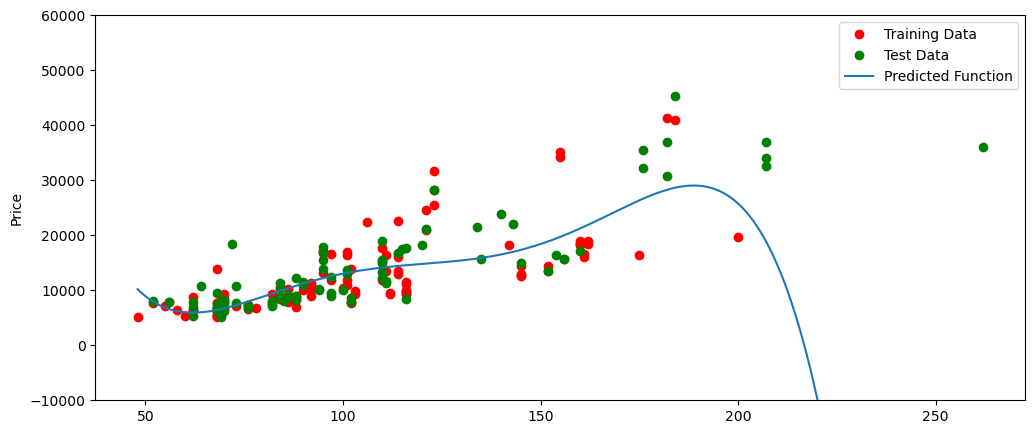

In [71]:
## use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

In [75]:
## R^2 of the training data:
print("R2 Score on Training Data: ----",poly.score(x_train_pr, y_train))
## R^2 of the testing data:
print("R2 Score on Testing Data: ----",poly.score(x_test_pr, y_test))

R2 Score on Training Data: ---- 0.5571757385092833
R2 Score on Testing Data: ---- -29.62443457615078


+ We see the R^2 for the training data is 0.5567 
+ while the R^2 on the test data was -29.87. 
+ The lower the R^2, the worse the model. 
+ A negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

Text(3, 0.75, 'Maximum R^2 ')

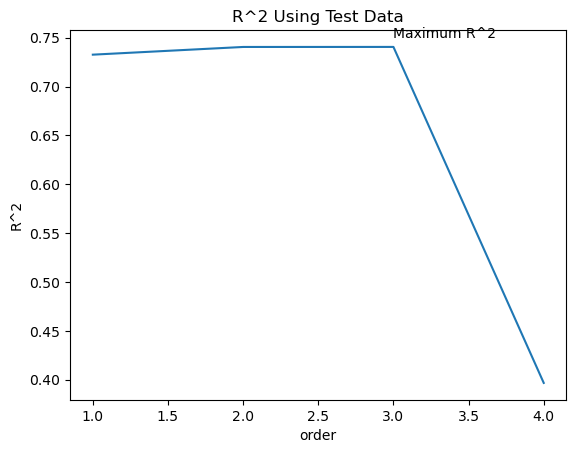

In [76]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

The following interface allows you to experiment with different polynomial orders and different amounts of data.

In [77]:
## function used in plotting in next session
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [78]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

**RIDGE REGRESSION**

+ we will review Ridge Regression and see how the parameter alpha changes the model
+ here our test data will be used as validation data.
+ Let's perform a degree two polynomial transformation on our data.

In [84]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
pr

## import ridge from the linear model
from sklearn.linear_model import Ridge
## create a Ridge regression object, setting the regularization parameter (alpha) to 0.1
RigeModel=Ridge(alpha=1)
## fit the model using the method fit.
RigeModel.fit(x_train_pr, y_train)
## obtain a prediction:
yhat = RigeModel.predict(x_test_pr)
#print(yhat)

## compare the first five predicted samples to our test set:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6577.53720013  9627.07836056 20940.46130682 19402.66018406]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.

In [85]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:04<00:00, 218.74it/s, Test Score=0.564, Train Score=0.859]


plot out the value of R^2 for different alphas:

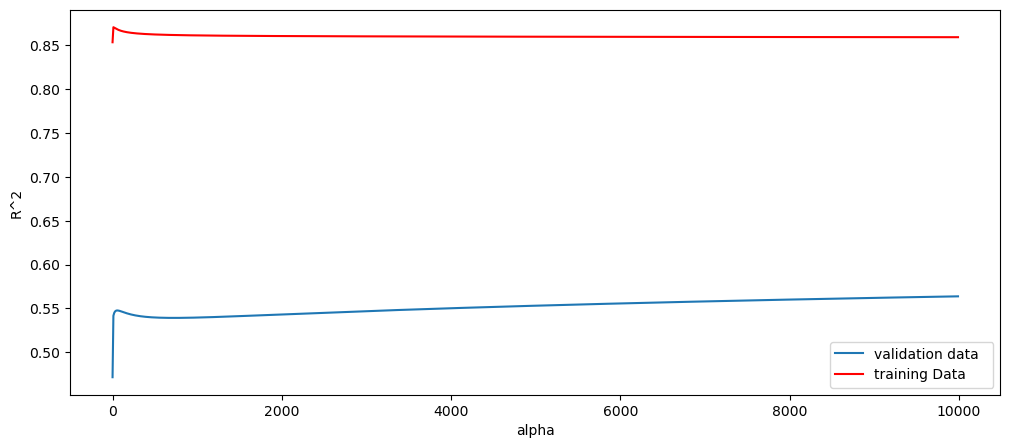

In [86]:
width = 12
height = 5
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

+ The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. 
+ The x-axis represents the different values of Alpha.

**GRID SEARCH**

+ The term alpha is a hyperparameter. 
+ Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.


In [94]:
## import gridsearchcv module from model selection'
from sklearn.model_selection import GridSearchCV
## create a dictionary of parameter values
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
print(parameters1)
## Create a Ridge Regression Object,
RR=Ridge()
print(RR)
## Create a ridge grid search object:
Grid1 = GridSearchCV(RR, parameters1,cv=4)
## Fit the model:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
## The object finds the best parameter values on the validation data. 
## We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:
BestRR=Grid1.best_estimator_
print(BestRR)
## now test our model on the test data:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
Ridge()
Ridge(alpha=10000)


0.8412287494745088

Here with the GridSearch CV method, We have a Score of 84% Accuracy.



******